# Analysis and visual inspection of human mobility subflows

In [38]:
import pandas as pd
import numpy as np
import os
import datetime

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
n_subflows = 15

In [40]:
def time_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [41]:
def read_flows_fn(target_time_period):
    subflows= {}
    for c in range(1,n_subflows):
        flow = pd.read_csv(os.path.join('data', 'INE_subflows','flow_criterion_{}_raw_{}.csv'.format(c,target_time_period)), 
                           index_col=0,
                           parse_dates= [0], 
                           date_parser=time_parser)
        subflows[c] = flow
    return subflows

In [42]:
def plot_flows_fn(subflows_):
    f, axes = plt.subplots(int(len(subflows_)/2), 2, figsize=(20,10), sharey='row', sharex='col')
    axe = axes.ravel()
    subflows= {}
    for c in subflows_:
        flow = subflows_[c]
        flow.plot(ax=axe[c-1], label=c, grid=True, logy=True, title='criterion {}'.format(c))

In [43]:
time_period= 'july'  
#time_period= 'sept_oct'

In [44]:
subflows = read_flows_fn(time_period)

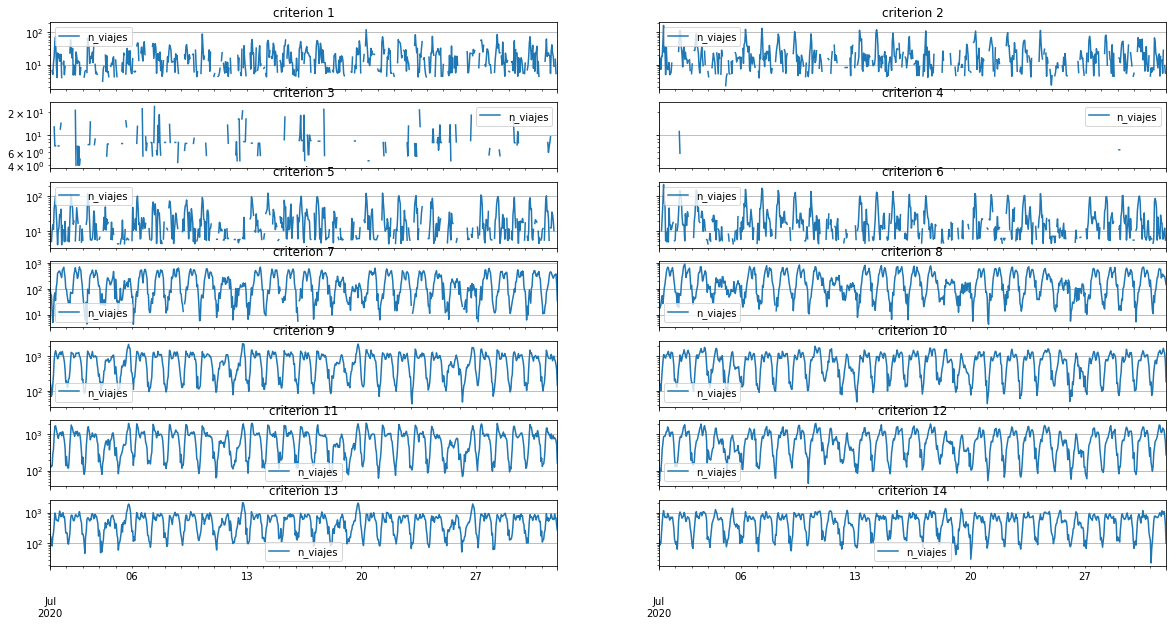

In [45]:
plot_flows_fn(subflows)

Rate of null points in the target time series

In [46]:
for c in subflows:
    df = subflows[c]
    num_nan= df['n_viajes'].isna().sum()
    print('Criterion: {}: # non-null points: {}, # total points: {}, rate: {:.2f}'.format(c, num_nan, len(df), num_nan/len(df)))

Criterion: 1: # non-null points: 185, # total points: 744, rate: 0.25
Criterion: 2: # non-null points: 196, # total points: 744, rate: 0.26
Criterion: 3: # non-null points: 495, # total points: 744, rate: 0.67
Criterion: 4: # non-null points: 718, # total points: 744, rate: 0.97
Criterion: 5: # non-null points: 185, # total points: 744, rate: 0.25
Criterion: 6: # non-null points: 174, # total points: 744, rate: 0.23
Criterion: 7: # non-null points: 7, # total points: 744, rate: 0.01
Criterion: 8: # non-null points: 2, # total points: 744, rate: 0.00
Criterion: 9: # non-null points: 0, # total points: 744, rate: 0.00
Criterion: 10: # non-null points: 0, # total points: 744, rate: 0.00
Criterion: 11: # non-null points: 0, # total points: 744, rate: 0.00
Criterion: 12: # non-null points: 0, # total points: 744, rate: 0.00
Criterion: 13: # non-null points: 0, # total points: 744, rate: 0.00
Criterion: 14: # non-null points: 0, # total points: 744, rate: 0.00


Resample subflows with missing values

In [70]:
subflows_resampled= {}
for c in [6, 7, 8]:
    df = subflows[c]
    df = df.rename(columns={'n_viajes': 'n_viajes_old'})
    df = df.assign(n_viajes=df['n_viajes_old'].interpolate(method='time'))
    subflows_resampled[c] = df
    df.to_csv(os.path.join('data', 'INE_subflows','flow_criterion_{}_clean_{}.csv'.format(c, time_period)))

Save subflows without missing values

In [47]:
for c in [9, 10, 11, 12, 13, 14]:
    subflows[c].to_csv(os.path.join('data', 'INE_subflows','flow_criterion_{}_clean_{}.csv'.format(c, time_period)))

### Pearson correlation between the three subflows

In [11]:
r, p= pearsonr(subflows_resampled[6]['n_viajes'], subflows_resampled[7]['n_viajes'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

NameError: name 'subflows_resampled' is not defined

In [12]:
r, p= pearsonr(subflows_resampled[6]['n_viajes'], subflows_resampled[8]['n_viajes'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

NameError: name 'subflows_resampled' is not defined

In [13]:
r, p= pearsonr(subflows_resampled[7]['n_viajes'], subflows_resampled[8]['n_viajes'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

NameError: name 'subflows_resampled' is not defined